In [2]:
#Análisis de la señal Davs

#'aplanar' la señal

# setear el cero como el valor lejos del espectro

#calcular los ceros


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import os
from scipy.signal import savgol_filter

def cargar_datos(n, i, ruta):
    
    #n número de datos tomados +1
    # i número de medición -1 (empezando a contar desde 1)

    columnas = [f'{j}' for j in range(1, n)]

    # Rutas a archivos
    señales_Ch1 = os.path.join(ruta, 'Mediciones_CH1.csv')
    señales_Ch2 = os.path.join(ruta, 'Mediciones_CH2.csv')
    tiempos_Ch1 = os.path.join(ruta, 'Tiempos_CH1.csv')
    tiempos_Ch2 = os.path.join(ruta, 'Tiempos_CH2.csv')
    unidades_escalas = os.path.join(ruta, 'Unidades y escala.csv')

    # Lectura de archivos
    data_señales_Ch1 = pd.read_csv(señales_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_señales_Ch2 = pd.read_csv(señales_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch1 = pd.read_csv(tiempos_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch2 = pd.read_csv(tiempos_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_unidades_escalas = pd.read_csv(unidades_escalas, delimiter=',', header=None, names=columnas)

    # Selección de columna
    col_name = str(i + 1)

    # Extraer variables

    globals()['tiempos1'] = data_tiempos_Ch1[col_name].values
    globals()['voltajes1'] = data_señales_Ch1[col_name].values

    globals()['tiempos2'] = data_tiempos_Ch2[col_name].values
    globals()['voltajes2'] = data_señales_Ch2[col_name].values

    escala_Ch1 = float(data_unidades_escalas[col_name].iloc[4])
    escala_Ch2 = float(data_unidades_escalas[col_name].iloc[8])

    globals()['error_Ch1'] = escala_Ch1 * 10 / 256
    globals()['error_Ch2'] = escala_Ch2 * 10 / 256


def lineal(x, m, b):
  y =  m * x + b
  return y


def cargar_datos_2(n, i, ruta, a):
    
    #n número de datos tomados +1
    # i número de medición -1 (empezando a contar desde 1)
    # sufijo para cada medición distinta

    columnas = [f'{j}' for j in range(1, n)]

    # Rutas a archivos
    señales_Ch1 = os.path.join(ruta, 'Mediciones_CH1.csv')
    señales_Ch2 = os.path.join(ruta, 'Mediciones_CH2.csv')
    tiempos_Ch1 = os.path.join(ruta, 'Tiempos_CH1.csv')
    tiempos_Ch2 = os.path.join(ruta, 'Tiempos_CH2.csv')
    unidades_escalas = os.path.join(ruta, 'Unidades y escala.csv')

    # Lectura de archivos
    data_señales_Ch1 = pd.read_csv(señales_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_señales_Ch2 = pd.read_csv(señales_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch1 = pd.read_csv(tiempos_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch2 = pd.read_csv(tiempos_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_unidades_escalas = pd.read_csv(unidades_escalas, delimiter=',', header=None, names=columnas)

    # Selección de columna
    col_name = str(i + 1)

    # Variables con sufijo personalizado
    globals()[f'tiempos1_{a}'] = data_tiempos_Ch1[col_name].values
    globals()[f'voltajes1_{a}'] = data_señales_Ch1[col_name].values

    globals()[f'tiempos2_{a}'] = data_tiempos_Ch2[col_name].values
    globals()[f'voltajes2_{a}'] = data_señales_Ch2[col_name].values

    escala_Ch1 = float(data_unidades_escalas[col_name].iloc[4])
    escala_Ch2 = float(data_unidades_escalas[col_name].iloc[8])

    globals()[f'error_Ch1_{a}'] = escala_Ch1 * 10 / 256
    globals()[f'error_Ch2_{a}'] = escala_Ch2 * 10 / 256


def graficar_4_subplots(x1, y1, x2, y2, x3, y3, x4, y4):
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))

    # Gráfico 1
    axs[0, 0].plot(x1, y1, '.', color = 'darkcyan', label= 'Canal 1')
    axs[0, 0].set_title("señal osciloscopio")
    axs[0, 0].set_xlabel("tiempo [s]")
    axs[0, 0].set_ylabel("v")

    # Gráfico 2
    axs[0, 1].plot(x2, y2, ".", color = 'darkslategray')
    axs[0, 1].set_title("recorte lineal")
    axs[0, 1].set_xlabel("tiempo [s]")
    axs[0, 1].set_ylabel("v")

    # Gráfico 3
    axs[1, 0].plot(x3, y3, ".", markersize=2, color = 'darkslategray')
    axs[1, 0].set_title("aplanado")
    axs[1, 0].set_xlabel("tiempo [s]")
    axs[1, 0].set_ylabel("Absorción [a.u.]")

    # Gráfico 4
    axs[1, 1].plot(x4, y4, ".", markersize=2, color = 'darkslategray')
    axs[1, 1].set_title("normalizado e invertido")
    axs[1, 1].set_xlabel("tiempo [s]")
    axs[1, 1].set_ylabel("Absorción [a.u.]")

    plt.tight_layout()
    plt.show()


# primer análisis

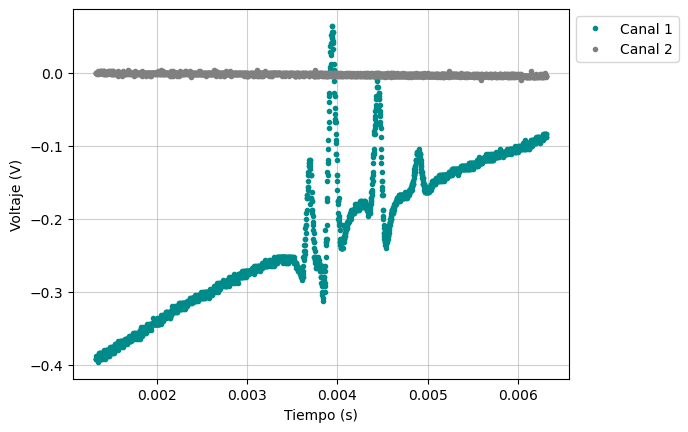

In [4]:
cargar_datos(n=5, i=0, ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_davs')


plt.plot(tiempos1, voltajes1,'.', color = 'darkcyan', label= 'Canal 1')
plt.plot(tiempos2, voltajes2, '.', color ='gray', label= 'Canal 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
#plt.xlim(-0.0015,-00.0016)
plt.grid(alpha = 0.6)
plt.show()

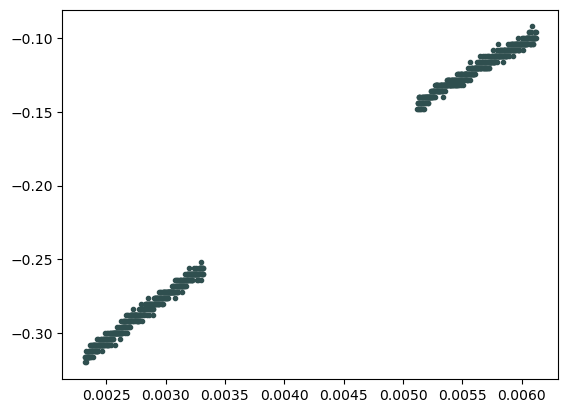

   Los parametros óptimos son  Los errores de los parámetros son
0                   58.546418                           0.086415
1                   -0.449955                           0.000385


In [71]:
#uso los dos extremos de la parte lineal para ajustar

A = 500
B = 1000

C = 1900
D = 2400

plt.plot(tiempos2[A:B], voltajes1[A:B], ".", color = 'darkslategray')
plt.plot(tiempos2[C:D], voltajes1[C:D], ".", color = 'darkslategray')

plt.show()

#para que esté bien plana la señal, uso un intervalo antes del espectro, y después del espectro,
#y realizo el ajuste lineal con estos dos intervalos
voltajes_intervalos = np.concatenate([voltajes1[A:B], voltajes1[C:D]])
tiempos_intervalos = np.concatenate([tiempos2[A:B], tiempos2[C:D]])

#Cuando se vea la recta, hago el ajuste:

param_iniciales = [0.01, 0]
popt_0, pcov_0 = curve_fit(lineal, tiempos_intervalos,voltajes_intervalos, p0=param_iniciales, sigma = error_Ch1, absolute_sigma=True)
incertidumbre_0 = np.sqrt(np.diag(pcov_0))

tabla = pd.DataFrame({
        'Los parametros óptimos son': popt_0,
        'Los errores de los parámetros son': incertidumbre_0,
        })

print(tabla)


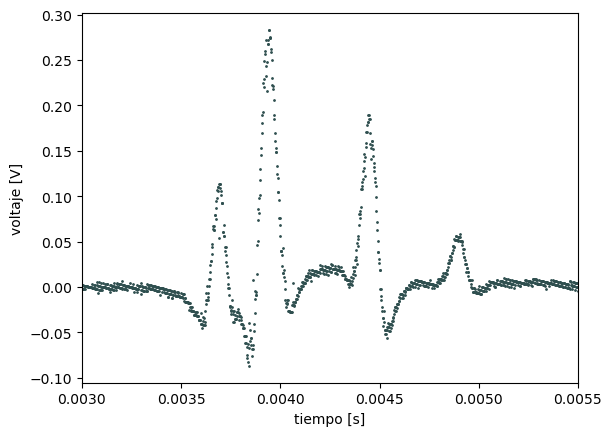

In [21]:
#Grafico el espectro sin la componente que hace crecer la intensidad del láser por
#el solo hecho de que tiene más corriente

x_fit_n =  np.linspace(np.min(tiempos2), np.max(tiempos2), len(tiempos2), endpoint = True)

plt.plot(tiempos2, voltajes1 - lineal(x_fit_n, *popt_0), ".", markersize=2, color = 'darkslategray')

plt.xlabel('tiempo [s]')
plt.ylabel('voltaje [V]')

plt.xlim(0.003, 0.0055)
plt.show()


espectro = voltajes1 - lineal(x_fit_n, *popt_0)

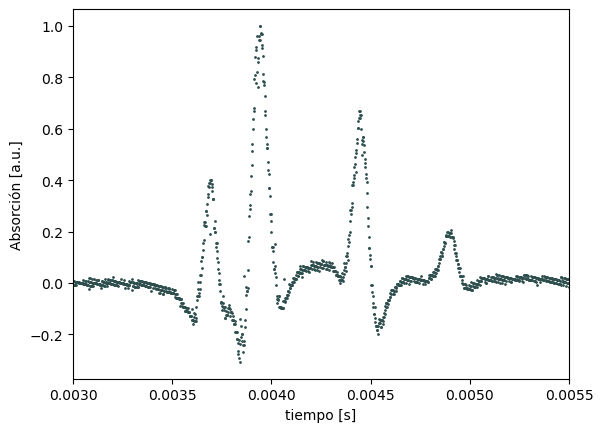

In [29]:
#inertimos, para graficar la absorción en función del tiempo
#Y normalizamos para que el pico de mayor amplitud valga 1

#espectro_inv = espectro * (-1) # acá no hace falta invertirlo
espectro_norm = espectro / np.max(espectro)


plt.plot(tiempos2, espectro_norm, ".", markersize=2, color = 'darkslategray')

plt.xlabel('tiempo [s]')
plt.ylabel('Absorción [a.u.]')

plt.xlim(0.003, 0.0055)
#plt.ylim(0)
plt.show()

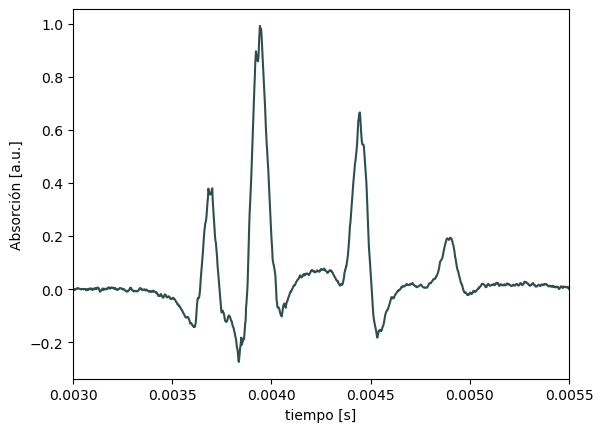

In [36]:
#pruebo de interpolar para suavizar la señal:

#(filtro 'Savitzky-Golay')
from scipy.signal import savgol_filter
señal_suavizada = savgol_filter(espectro_norm, window_length=11, polyorder=2)

plt.plot(tiempos2, señal_suavizada, "-", markersize=2, color = 'darkslategray')

plt.xlabel('tiempo [s]')
plt.ylabel('Absorción [a.u.]')

plt.xlim(0.003, 0.0055)
#plt.ylim(0)
plt.show()

# compacto esto para que sea más rápido

replace _a para poder ir guardando varias mediciones distintas

   Los parametros óptimos son  Los errores de los parámetros son
0                   69.780442                           0.086415
1                   -0.579398                           0.000459


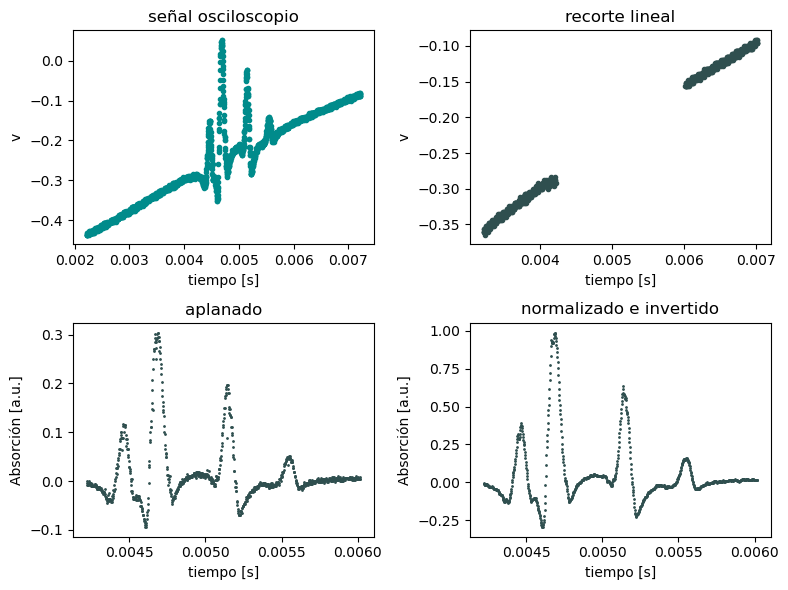

In [4]:
cargar_datos_2(n = 4, i = 0, ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_comparación', a = 'a')

#uso los dos extremos de la parte lineal para ajustar
A = 500
B = 1000

C = 1900
D = 2400

voltajes_intervalos_a = np.concatenate([voltajes1_a[A:B], voltajes1_a[C:D]])
tiempos_intervalos_a = np.concatenate([tiempos1_a[A:B], tiempos1_a[C:D]])

#Cuando se vea la recta, hago el ajuste:

x_fit_a =  np.linspace(np.min(tiempos2_a), np.max(tiempos2_a), len(tiempos2_a), endpoint = True)

param_iniciales = [0.01, 0]
popt_0, pcov_0 = curve_fit(lineal, tiempos_intervalos_a,voltajes_intervalos_a, p0=param_iniciales, sigma = error_Ch1_a, absolute_sigma=True)
incertidumbre_0 = np.sqrt(np.diag(pcov_0))

tabla = pd.DataFrame({
        'Los parametros óptimos son': popt_0,
        'Los errores de los parámetros son': incertidumbre_0,
        })
print(tabla)


t_espectro_a = tiempos1_a[B:C] #así ya está recortado
espectro_a = (voltajes1_a - lineal(x_fit_a, *popt_0))[B:C] 

#inertimos, para graficar la absorción en función del tiempo
#Y normalizamos para que el pico de mayor amplitud valga 1
espectro_a_inv = espectro_a * (-1)
espectro_a_norm = espectro_a / np.max(espectro_a)


#filtrado
señal_suavizada_a = savgol_filter(espectro_a_norm, window_length=11, polyorder=2)


graficar_4_subplots(tiempos1_a, voltajes1_a, tiempos_intervalos_a, voltajes_intervalos_a, t_espectro_a, espectro_a, t_espectro_a, señal_suavizada_a)


# Buscar los ceros

Med_davs salió mal (porque las señales no estaban niveladas) y Med_comparación meedio medio

In [5]:
# definimos esta función, que al detectar un cruce por el eje x, hace una lineal entre esos dos puntos

def detectar_cruces_cero(tiempos, señal):
    cruces = []

    for i in range(len(señal) - 1):
        y1, y2 = señal[i], señal[i + 1]
        if y1 * y2 < 0:  # hay cruce por cero
            t1, t2 = tiempos[i], tiempos[i + 1]
            # Interpolación lineal para encontrar el tiempo del cruce
            t_cruce = t1 - y1 * (t2 - t1) / (y2 - y1)
            cruces.append(t_cruce)

    return np.array(cruces)


def detectar_cruces_cero_negativos(tiempos, señal):
    cruces = []

    for i in range(len(señal) - 1):
        y1, y2 = señal[i], señal[i + 1]
        if y1 > 0 and y2 < 0:  # Cruce por cero con pendiente negativa
            t1, t2 = tiempos[i], tiempos[i + 1]
            # Interpolación lineal para encontrar el tiempo exacto del cruce
            t_cruce = t1 - y1 * (t2 - t1) / (y2 - y1)
            cruces.append(t_cruce)

    return np.array(cruces)


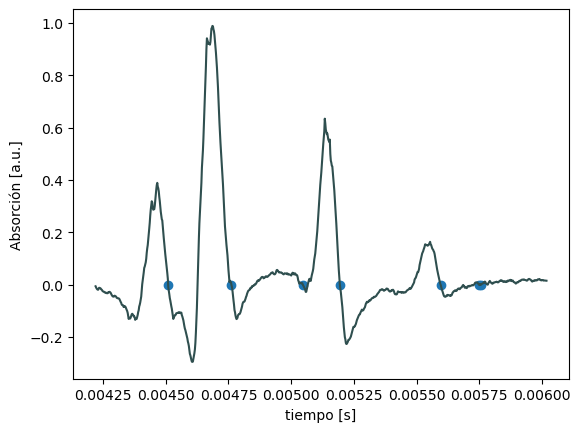

In [10]:
from scipy.signal import savgol_filter
señal_suavizada = savgol_filter(espectro_a_norm, window_length=11, polyorder=2)

#a = 1000
#b = 1900


cruces_negativos = detectar_cruces_cero_negativos(t_espectro_a, señal_suavizada_a)


plt.plot(t_espectro_a, señal_suavizada_a, "-", markersize=2, color = 'darkslategray')
#plt.scatter(np.array(cruces_por_cero), np.zeros(len(cruces_por_cero)))
plt.scatter(np.array(cruces_negativos), np.zeros(len(cruces_negativos)))

plt.xlabel('tiempo [s]')
plt.ylabel('Absorción [a.u.]')

#plt.xlim(0.003, 0.0055)
#plt.ylim(0)
plt.show()

In [52]:
cruces_por_cero = detectar_cruces_cero(tiempos2[a:b], señal_suavizada[a:b])

print("Cruces por cero en segundos:")
print(cruces_por_cero)

cruces_negativos = detectar_cruces_cero_negativos(tiempos2[a:b], señal_suavizada[a:b])

print("Cruces por cero (pendiente negativa):")
print(cruces_negativos)

Cruces por cero en segundos:
[0.00333338 0.00334338 0.00364035 0.00373798 0.00387855 0.00402355
 0.0041043  0.00450539 0.00464993 0.00496625 0.00503949]
Cruces por cero (pendiente negativa):
[0.00334338 0.00373798 0.00402355 0.00450539 0.00496625]



# Graficamos ambos canales.



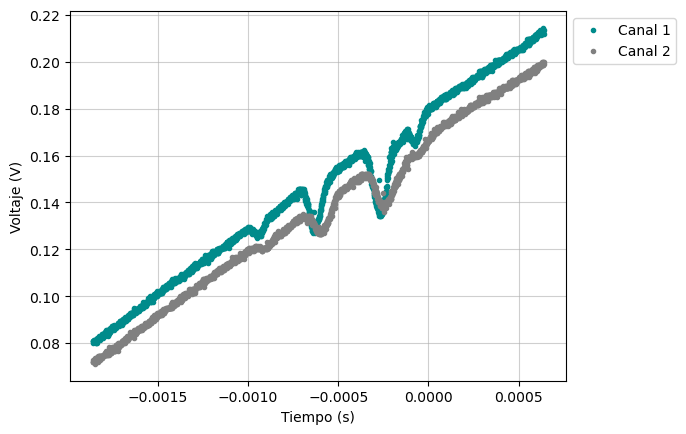

In [19]:
cargar_datos(n=4, i=2, ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_comparación')


plt.plot(tiempos1, voltajes1,'.', color = 'darkcyan', label= 'Canal 1')
plt.plot(tiempos2, voltajes2, '.', color ='gray', label= 'Canal 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
#plt.xlim(-0.0015,-00.0016)
plt.grid(alpha = 0.6)
plt.show()


#  Análisis compacto davs

(Función de análisis_espectro modificada para la señal davs)

devuelve: array de la señal normalizada y suave, eje x con las frecuencas relativas y eje x con las frecuencias absolutas,  
y los gráficos para ir ajustando los valores de `A,B,C,D` y los de `l` y `m` 

`espectro_suave_a`   
`f_rel_a`  
`f_abs_a`    

`n` cantidad de mediciones en el csv + 1  
`i` índice de la medicion a analizar (empezando desde 0)  
`a` sufijo para diferenciar mediciones  
`ruta` ruta de la carpeta con los 5 csv  
`A,B,C,D` límites para ajustar la lineal (para 'aplanar' la señal)  
`graficar` True muestra para ir variando los parámetros, False no los muestra  
`norm` True, normaliza la señal por su valor más alto, False no lo hace -> esto lo puse para, al variar el campo, ver si aumenta la absorción en cada pico.  
`l` índice de la lista de raíces (pasos por el cero de la parte pos a la neg) correspondiente al primer cero 'posta', o sea el que se corresponde con la primer línea de absorción  
`m` idem `l` pero para el último cero, la idea es usar -1, -2, etc, ya que no sabemos la cantidad de ceros de antemano

La función asume la señal del espectro en el canal 1


Cambios:
- no hacemos la señal toda positiva, justamente queremos ver los ceros
- no invertimos la señal en el eje y ni en el x:

estos parámetros ya no los uso:  
`h` altura a partir de la cual calcula los máximos (picos)  
`dis` distancia mínima en puntos entre picos  
`pro` "prominencia" mínima (cuán destacado es el pico)  



posible error al hacer el ajuste lineal:  
por la versión de `curvefit` a lo mejor el error en y tiene que ser un array y no sólo un valor, en ese caso añadir en sigma `error_Ch1_a * np.ones(len(tiempos_intervalos_a))`




In [1]:
import numpy as np
import pandas as pd
import math
import time
import pyvisa
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

In [5]:

def cargar_datos_2(n, i, ruta, a):
    
    #n número de datos tomados +1
    # i número de medición -1 (empezando a contar desde 1)
    # sufijo para cada medición distinta

    columnas = [f'{j}' for j in range(1, n)]

    # Rutas a archivos
    señales_Ch1 = os.path.join(ruta, 'Mediciones_CH1.csv')
    señales_Ch2 = os.path.join(ruta, 'Mediciones_CH2.csv')
    tiempos_Ch1 = os.path.join(ruta, 'Tiempos_CH1.csv')
    tiempos_Ch2 = os.path.join(ruta, 'Tiempos_CH2.csv')
    unidades_escalas = os.path.join(ruta, 'Unidades y escala.csv')

    # Lectura de archivos
    data_señales_Ch1 = pd.read_csv(señales_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_señales_Ch2 = pd.read_csv(señales_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch1 = pd.read_csv(tiempos_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch2 = pd.read_csv(tiempos_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_unidades_escalas = pd.read_csv(unidades_escalas, delimiter=',', header=None, names=columnas)

    # Selección de columna
    col_name = str(i + 1)

    # Variables con sufijo personalizado
    globals()[f'tiempos1_{a}'] = data_tiempos_Ch1[col_name].values
    globals()[f'voltajes1_{a}'] = data_señales_Ch1[col_name].values

    globals()[f'tiempos2_{a}'] = data_tiempos_Ch2[col_name].values
    globals()[f'voltajes2_{a}'] = data_señales_Ch2[col_name].values

    escala_Ch1 = float(data_unidades_escalas[col_name].iloc[4])
    escala_Ch2 = float(data_unidades_escalas[col_name].iloc[8])

    globals()[f'error_Ch1_{a}'] = escala_Ch1 * 10 / 256
    globals()[f'error_Ch2_{a}'] = escala_Ch2 * 10 / 256


def lineal(x, m, b):
  y =  m * x + b
  return y


def detectar_cruces_cero_negativos(tiempos, señal):
    cruces = []

    for i in range(len(señal) - 1):
        y1, y2 = señal[i], señal[i + 1]
        if y1 > 0 and y2 < 0:  # Cruce por cero con pendiente negativa
            t1, t2 = tiempos[i], tiempos[i + 1]
            # Interpolación lineal para encontrar el tiempo exacto del cruce
            t_cruce = t1 - y1 * (t2 - t1) / (y2 - y1)
            cruces.append(t_cruce)

    return np.array(cruces)



#lo cambiamos a ms para que no se superpongan los ticks de x
def graficar_6_subplots(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, zeros): #ahora en vez de peaks tengo zeros
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))  # 3 filas, 2 columnas

    # Gráfico 1
    axs[0, 0].plot(x1, y1, '.', color='darkcyan', label='Canal 1')
    axs[0, 0].set_title("señal osciloscopio")
    axs[0, 0].set_xlabel("tiempo [s]")
    axs[0, 0].set_ylabel("v")

    # Gráfico 2
    axs[0, 1].plot(x2*1000, y2, ".", color='darkslategray')
    axs[0, 1].set_title("recorte lineal")
    axs[0, 1].set_xlabel("tiempo [ms]")
    axs[0, 1].set_ylabel("v")

    # Gráfico 3
    axs[1, 0].plot(x3*1000, y3, ".", markersize=2, color='darkslategray')
    axs[1, 0].set_title("aplanado")
    axs[1, 0].set_xlabel("tiempo [ms]")
    axs[1, 0].set_ylabel("davs")

    # Gráfico 4
    axs[1, 1].plot(x4*1000, y4, ".", markersize=2, color='darkslategray')
    axs[1, 1].set_title("normalizado y suavizado")
    axs[1, 1].set_xlabel("tiempo [ms]")
    axs[1, 1].set_ylabel("davs")

    # Gráfico 5
    axs[2, 0].plot(x5*1000, y5, label="señal")
    axs[2, 0].plot(zeros*1000, np.zeros_like(zeros), "rx",label="raíces detectadas")

    axs[2, 0].set_title("ceros")
    axs[2, 0].set_xlabel("tiempo [ms]")
    axs[2, 0].set_ylabel("Davs")
    axs[2, 0].legend()  # <-- Mostrar leyenda sólo en el quinto gráfico

    # Gráfico 6
    axs[2, 1].plot(x6, y6, ".", markersize=2, color='teal')
    axs[2, 1].axvline(0 , color="darkslategray", linestyle="dashed") # para ver que haya tomado los ceros que queremos
    axs[2, 1].axvline(7.649, color="darkslategray", linestyle="dashed") # para ver que haya tomado los ceros que queremos
    axs[2, 1].set_title("reescalado")
    axs[2, 1].set_xlabel("Frecuencia relativa (Ghz)")
    axs[2, 1].set_ylabel("Davs")

    plt.tight_layout()
    plt.show()



def análisis_compacto_davs(n, i, a, ruta, A, B, C, D, graficar=True, norm=True,l = 0, m = -1):

        cargar_datos_2(n = n, i = i, ruta=ruta, a = 'a')

        #uso los dos extremos de la parte lineal para ajustar

        voltajes_intervalos_a = np.concatenate([voltajes1_a[A:B], voltajes1_a[C:D]])
        tiempos_intervalos_a = np.concatenate([tiempos1_a[A:B], tiempos1_a[C:D]])

        #Cuando se vea la recta, hago el ajuste:

        x_fit_a =  np.linspace(np.min(tiempos2_a), np.max(tiempos2_a), len(tiempos2_a), endpoint = True)

        param_iniciales = [0.01, 0]
        popt_0, pcov_0 = curve_fit(lineal, tiempos_intervalos_a,voltajes_intervalos_a, p0=param_iniciales, sigma = error_Ch1_a, absolute_sigma=True)
        incertidumbre_0 = np.sqrt(np.diag(pcov_0))

        tabla = pd.DataFrame({
                'Los parametros óptimos son': popt_0,
                'Los errores de los parámetros son': incertidumbre_0,
                })
        if graficar:#así oculto estas salidas
                print(tabla)


        t_espectro_a = tiempos1_a[B:C] #así ya está recortado
        espectro_a = (voltajes1_a - lineal(x_fit_a, *popt_0))[B:C] 

        #inertimos, para graficar la absorción en función del tiempo
        #Y normalizamos para que el pico de mayor amplitud valga 1
        #Además, hacemos que la señal sea toda positiva (así al comparar están todas en la misma escala vertical)
        
        #espectro_a_inv = espectro_a * (-1)
        #espectro_a_pos = espectro_a_inv - np.min(espectro_a_inv) # con el - me aseguro de si ya es toda positiva, que se baje el minimo al cero
        
        #normalizamos
        espectro_a_norm = espectro_a / np.max(espectro_a)

        #filtrado
        señal_suavizada_a = savgol_filter(espectro_a_norm, window_length=11, polyorder=2)
  
        #damos vuelta el espectro
        #espectro_suave_a = señal_suavizada_a[::-1]
        espectro_suave_a = señal_suavizada_a

        #encuentro el primer y último cero

        zeros = detectar_cruces_cero_negativos(t_espectro_a, espectro_suave_a)

        
        first_zero, last_zero = zeros[l], zeros[m] 
        #en general l = 0 y m = -1, peero si llega a detectar otros,
        #para poder ajustarlo y que no se reescalee mal


        # obtener primer y último cero
        x_first, x_last = first_zero, last_zero


        if graficar:#así oculto estas salidas
                print("Primer cero:", first_zero)
                print("Último cero:", last_zero)


        # reescaleo los tiempos a las frecuencias 
        # Fórmula de reescalado
        frecuencias_abs = [377.104391, 377.112040] #THz
        frecuencias_rel = [0, 7.649] #Ghz

        freq_relativas = (t_espectro_a - x_first) / (x_last - x_first) * (7.649 - 0) + 0 # le pongo el cero por si lo quiero cambiar después
        freq_absolutas = (t_espectro_a - x_first) / (x_last - x_first) * (frecuencias_abs[1] - frecuencias_abs[0]) + frecuencias_abs[0]


        if norm:
                espectro_suave_a = espectro_suave_a
        else:
                espectro_suave_a = espectro_suave_a * np.max(espectro_a)




        #grafico (sólo si graficar = True)
        if graficar:
                graficar_6_subplots(tiempos1_a, voltajes1_a, tiempos_intervalos_a, voltajes_intervalos_a, t_espectro_a, espectro_a, t_espectro_a, señal_suavizada_a, t_espectro_a, espectro_suave_a, freq_relativas, espectro_suave_a, zeros=zeros)


        #creo las variables globales

        globals()[f'espectro_suave_{a}'] = espectro_suave_a
        globals()[f'f_rel_{a}'] = freq_relativas
        globals()[f'f_abs_{a}'] = freq_absolutas

        #para ver el desplazamiento en función de la temperatura del láser
        #globals()[f't_raw_{a}'] = tiempos1_a
        #globals()[f'v_raw_{a}'] = voltajes1_a

        #para ver la amplitud relativa entre las señales, exporto la señal antes de normalizarla
        #señal_suavizada_a_sin_norm = savgol_filter(espectro_a_pos, window_length=11, polyorder=2) # la filtro
        #globals()[f'espectro_sin_norm_{a}'] = señal_suavizada_a_sin_norm


   Los parametros óptimos son  Los errores de los parámetros son
0                   69.780442                           0.086415
1                   -0.579398                           0.000459
Primer cero: 0.004509380088894236
Último cero: 0.005595771595781348


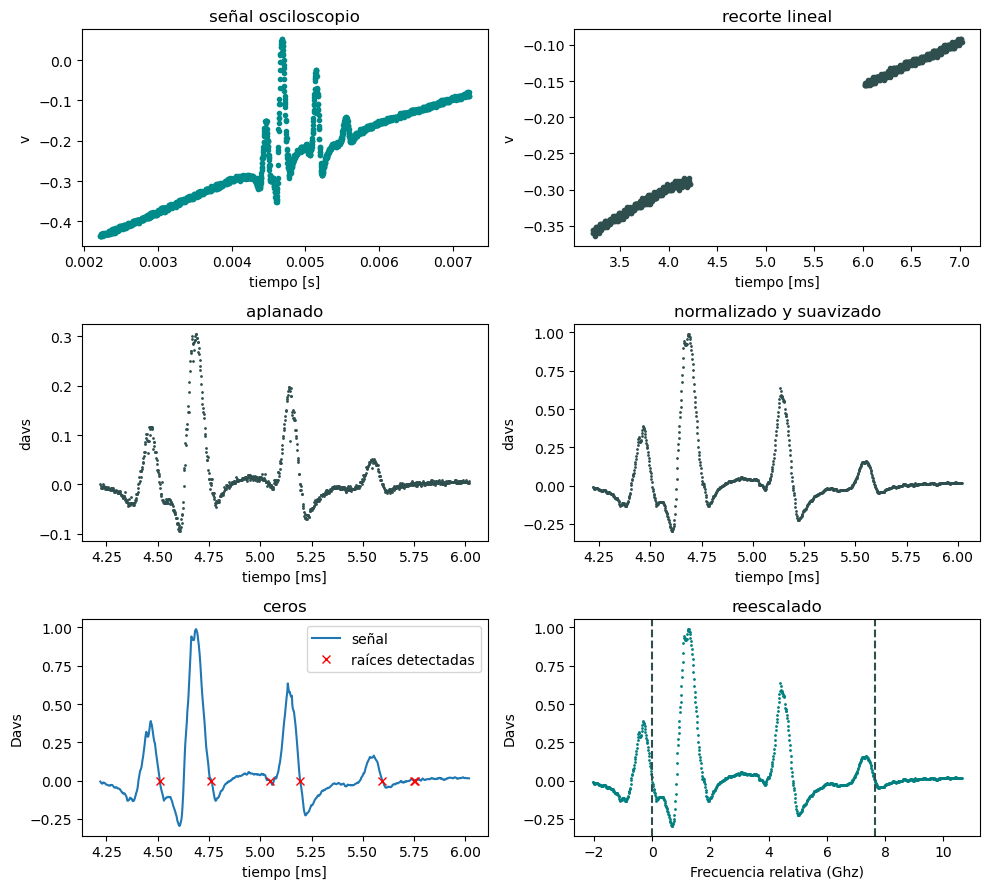

In [6]:

análisis_compacto_davs(n=4, i=0, a = 'a', ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_comparación', A =500
                  , B = 1000, C = 1900, D = 2400, graficar=True,  norm=True, l = 0, m = -3)



# Prueba para diferentes campos magnéticos


uso el mismo código que para graficar diferentes temperaturas, pero con análisis_comacto_davs

In [51]:
análisis_compacto_davs(n=5, i=0, a = 'b', ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_davs', A =500
                  , B = 1000, C = 1900, D = 2400, graficar=False,  norm=True, l = 1, m = -1)

In [61]:
análisis_compacto_davs(n=5, i=1, a = 'c', ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_davs', A =0
                  , B = 300, C = 1900, D = 2400, graficar=False,  norm=True, l = 0, m = -1)

In [65]:
análisis_compacto_davs(n=5, i=2, a = 'd', ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_davs', A =0
                  , B = 300, C = 1900, D = 2400, graficar=False,  norm=True, l = 0, m = -4)

In [69]:
análisis_compacto_davs(n=5, i=3, a = 'e', ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_davs', A =0
                  , B = 500, C = 2100, D = 2400, graficar=False,  norm=True, l = 0, m = -1)

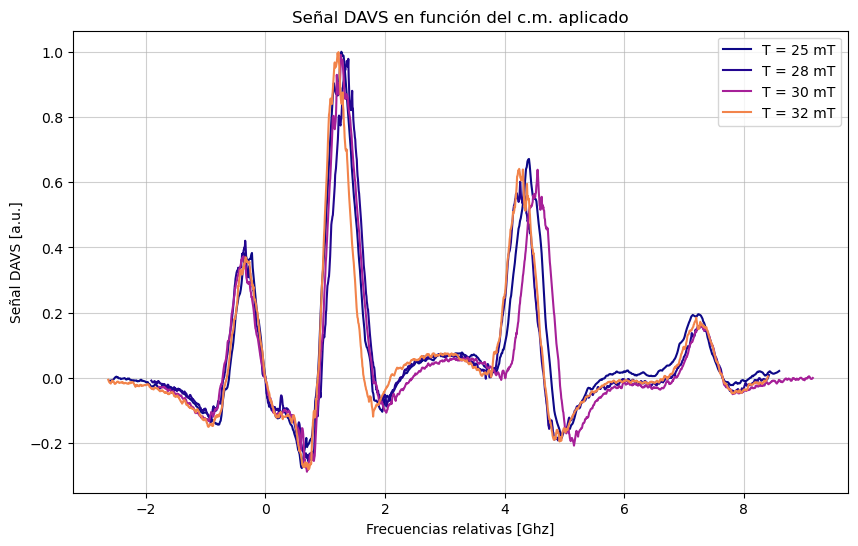

In [90]:
dominios = [f_rel_b, f_rel_c, f_rel_d, f_rel_e]
imagenes = [espectro_suave_b, espectro_suave_c, espectro_suave_d, espectro_suave_e]

campos_magnéticos = [25, 28, 30, 32]


#para ver las amplitudes relativas entre cada medición, 
#usando las imágenes obtenidas con norm = False!
#normalizo por el espectro más grande
valor_maximo = max(np.max(arr) for arr in imagenes) #es el mayor valor de todos los arrays
imagenes = [arr / valor_maximo for arr in imagenes] # esto divide a cada array de la lista por el valor_maximo


# Usamos un colormap para generar colores automáticamente
colormap = plt.cm.plasma  # plasma, magma, viridis, inferno, etc.
num_senales = len(dominios)
colors = [colormap(i  / (num_senales - 1) - 0.3) for i in range(num_senales)]

# Graficamos
plt.figure(figsize=(10, 6))

for i in range(num_senales):
    plt.plot(dominios[i], imagenes[i], color=colors[i], label=f"T = {campos_magnéticos[i]} mT")

plt.title("Señal DAVS en función del c.m. aplicado")
plt.xlabel("Frecuencias relativas [Ghz]")
plt.ylabel("Señal DAVS [a.u.]")
plt.legend()
plt.grid(True, alpha = 0.6)
plt.show()




Acá no se ven taan alineadas porque en el medio de las mediciones cambiamos las escalas y capaz tocamos un poco el setup, 
pero si medimos todo seguido, no deberían correrse tanto.